The behavior of this reservoir is defined by the mass balance equation:

$$
\begin{equation}
\Delta S = P - E - Q
\end{equation}
$$

$P$ and $E$ represent precipitation and the actual evaporation respectively. $S$ is the storage in the reservoir. The discharge $Q$ in the reservoir can be expressed as a function of stored water in the reservoir:

$$
\begin{equation}
Q = f\left(S\right)
\end{equation}
$$

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

At first we will consider the reservoir without the external drivers ```P``` and ```E``` and we assume that Q is equal to:

$$
\begin{equation}
Q = k S ^\alpha
\end{equation}
$$

Next to this, we also assmume a linear reservoir, so $\alpha$ is equal to 1.

With these assumptions, the system can be solved analytically. This makes it possible to calculate the storage and discharge at any time by knowing the initial condition and the ```k``` value.

### Part 1

Derive the analytical solution of the reservoir, as mentioned without the external drivers and as a **linear** reservoir. 

However, for hydrological systems it is not realistic to neglect the external drivers. If we take into account these drivers, the equation cannot be solved analytically, but has to be solved numerically.

An simple example of a numerical solution is the explicit forward Euler method. This method calculates the state of a system at each time step considering the state of the system at the previous time step and rate of changes:

$$
\begin{equation}
S(t + \Delta t) = F(S(t))
\end{equation}
$$

If we consider the linear reservoir problem without the external drivers, we obtain:

$$
\begin{equation}
\frac{dS(t)}{dt} = -k S(t) ^\alpha
\end{equation}
$$

The forward Euler method yields:

$$
\begin{equation}
\frac{S(t + \Delta t) - S(t)}{\Delta t} = -kS(t)^\alpha
\end{equation}
$$

This results in the numerical solution:

$$
\begin{equation}
S(t + \Delta t) = S(t) + -  \Delta t k  S(t) ^\alpha
\end{equation}
$$

Hence, if $ S(t) $ is known, $ S(t + \Delta t) $ can be calculated in one iteration. The big assumption in the forward Euler model is that $ S\left(t\right) $ is relatively constant during the timestep. This may not always be true. If $S\left(t\right)$ changes fast smaller timesteps need to be used to not make too big of an error. Other, more complicated methods to numerically solve differential equations exist such as Runga-Kutta. See the material of the MUDE course for more information on those. In hydrology it is always important to weigh if the error introduced by your numerical scheme is significant compared to the error introduced by the fact that the model is not perfect to begin with.

EXERCISE 1


In [18]:
S_0 = 75  # mm
k = 0.01  # per day
t_0 = 0  # day
t_max = 200  # days
dt = 10  # day(s)
alpha = 1 

In [19]:
def analytical_solve(k, t_max, t_0, t, S_0):
    S = np.zeros(len(t))
    S[0] = S_0
    for i in range(1, len(t)):
        S[i] = S_0*np.exp(-k*(t[i]-t_0))
    return S


In [20]:
def numerical_solve(t, t_max, dt,k, S_0):
    S = np.zeros(len(t))
    S[0] = S_0
    for i in range(1, len(t)):
        S[i] = S[i-1] - dt*k*S[i-1]
    return S

In [21]:
t = np.arange(t_0, t_max+1, dt)
S_anal = analytical_solve(k, t_max, t_0, t, S_0)
S_num = numerical_solve(t, t_max, dt, k, S_0)
print(S_anal)




[75.         67.86280635 61.40480648 55.56136655 50.27400345 45.48979948
 41.16087271 37.24389778 33.69967231 30.49272448 27.59095809 24.96533128
 22.58956589 20.43988448 18.4947723  16.73476201 15.14223885 13.7012643
 12.39741662 11.21764644 10.15014624]


In [22]:
print(S_num)

[75.         67.5        60.75       54.675      49.2075     44.28675
 39.858075   35.8722675  32.28504075 29.05653668 26.15088301 23.53579471
 21.18221524 19.06399371 17.15759434 15.44183491 13.89765142 12.50788627
 11.25709765 10.13138788  9.11824909]


## Part 3


Compute the analytical and numerical solution, both using the same values for the parameters. Plot the solutions on a single graph and see if there are any differences. 
Try alternating the values for the timestep ```dt``` and the ```k``` values to investigate their influence. Observe how the solutions compare to each other.

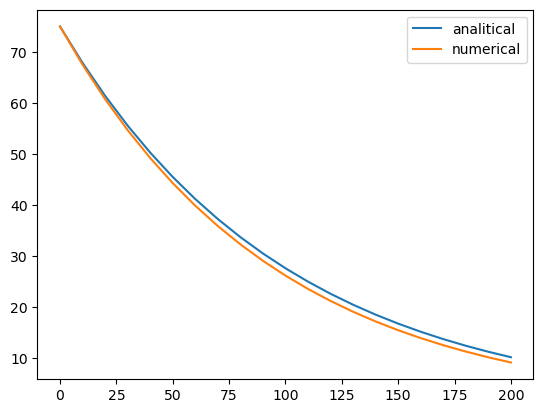

In [8]:
plt.plot(t,S_an, label = 'analitical')
plt.plot(t,S_num, label = 'numerical')
plt.legend()

## 2. Linear Reservoir with External Drivers

Until now we considered a model of linear reservoir without the external drivers. While in practice, hydrological models tend to mimic the interactions of the system with external drivers. 
Therefore, as mentioned earlier, neglecting the external drivers is not realistic. 
In the last part of this exercise, you will conside external drivers. This water balance equation cannot be solved analytically because precipitation and evaporation cannot be formulated; therefore, we only rely on numerical analysis.
### Part 4

Write a script in the code cell below to calculate the numerical solution of the linear reservoir problem **including** the external drivers

In [9]:
range(1,len(t))

range(1, 21)

In [23]:
import xarray as xr
filename = "OBS6_ERA5_reanaly_1_day_pr_2000-2018_newbasin.nc"  # Update the path to the correct location of the file
# Read the NetCDF file
ds = xr.open_dataset(filename)
# Convert to a pandas DataFrame
df = ds.to_dataframe()
# Reset the index if needed
df.reset_index(inplace=True)
df = df[df['bnds'] == 0]
df.index = pd.to_datetime(df['time'])
df.index = df.index.normalize()
df.drop(columns=['time', 'bnds'], inplace=True)
prec  = df['pr']  # Precipitation data
prec  = prec*86400  # Convert from m/s to mm/day)
prec[prec < 0] = 0  # Set negative values to zero


filename = "Derived_Makkink_evspsblpot_newbasin.nc"  # Update the path to the correct location of the file
# Read the NetCDF file
dsEP = xr.open_dataset(filename)
# Convert to a pandas DataFrame
dfEP = dsEP.to_dataframe()
# Reset the index if needed
dfEP.reset_index(inplace=True)
EP = dfEP['evspsblpot']  # Evapotranspiration data
EP.index = pd.to_datetime(dfEP['time'])
EP.index = EP.index.normalize()
EP = EP*86400  # Convert from mm/s to mm/day)
EP[EP < 0] = 0  # Set negative values to zero

station = pd.DataFrame({'P': prec, 'EV': EP}, index=prec.index) 
station

,P,EV
time,,
2000-01-01,0.004437,1.156963
2000-01-02,0.000000,1.175265
2000-01-03,0.020500,1.067080
2000-01-04,0.000000,1.165309
2000-01-05,0.000000,1.169341
...,...,...
2018-12-27,0.000153,1.134647
2018-12-28,0.043055,0.905379
2018-12-29,0.054359,0.937707


In [24]:
station['S'] = pd.Series()

station.head()

,P,EV,S
time,,,
2000-01-01,0.004437,1.156963,NaN
2000-01-02,0.000000,1.175265,NaN
2000-01-03,0.020500,1.067080,NaN
2000-01-04,0.000000,1.165309,NaN
2000-01-05,0.000000,1.169341,NaN


**we are using potential evaporation as acqual evaporation**

In [25]:
def numerical_solve_1(t, t_max, dt, k, E, P, S_0):
    S = np.zeros(len(t))
    S[0] = S_0
    for i in range(1, len(t)):
        S[i] = S[i-1]*(1-k*dt) + (P[i] - E[i])*dt
    return S

In [27]:
P = station['P'].values
E = station['EV'].values
dt_1 = 1
k=0.1
t_max_1 = len(station) - 1
t_0_1 = 0
t_1 = np.arange(t_0_1, t_max_1 + 1, dt_1)

S_num = numerical_solve_1(t_1, t_max_1, dt_1, k, E, P, 0)

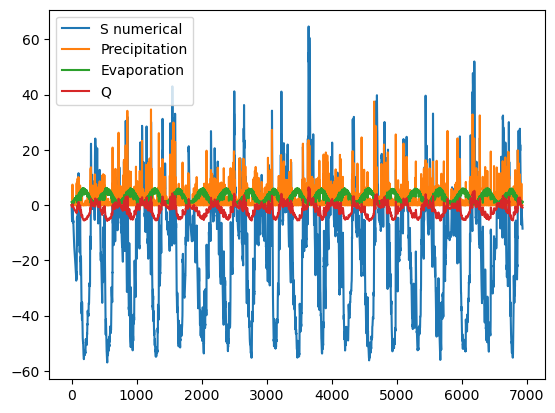

In [30]:
plt.plot(t_1, S_num, label = 'S numerical ')
plt.plot(t_1, station['P'].values, label = 'Precipitation')
plt.plot(t_1, station['EV'].values, label = 'Evaporation')
plt.plot(t_1, k*S_num, label = 'Q')
plt.legend()
